In [49]:
import pandas as pd

## Lectura de datos

In [50]:
cruces = pd.read_csv('cruces.csv', sep=';', encoding='latin1')
display(cruces.head())

,Codigo de vía tratado,Literal completo del vial tratado,Clase de la via tratado,Particula de la via tratado,Nombre de la via tratado,Codigo de via que cruza o enlaza,Literal completo del vial que cruza,Clase de la via que cruza,Particula de la via que cruza,Nombre de la via que cruza,Coordenada X (Guia Urbana) cm (cruce),Coordenada Y (Guia Urbana) cm (cruce),Longitud en S R WGS84 (cruce),Latitud en S R WGS84 (cruce)
0,127,CALLE DE ISABEL COLBRAND ...,CALLE,DE,ISABEL COLBRAND,2792,CALLE DE CASTIELLO DE JACA ...,CALLE,DE,CASTIELLO DE JACA,44260746,448479753,3º40'43.38'' W,40º30'36.13'' N
1,127,CALLE DE ISABEL COLBRAND ...,CALLE,DE,ISABEL COLBRAND,1837,CALLE DE FEDERICO MOMPOU ...,CALLE,DE,FEDERICO MOMPOU,44260732,448479748,3º40'43.43'' W,40º30'36.13'' N
2,127,CALLE DE ISABEL COLBRAND ...,CALLE,DE,ISABEL COLBRAND,87100,CALLE DE MARÍA TUBAU ...,CALLE,DE,MARIA TUBAU,44290433,448494484,3º40'30.85'' W,40º30'40.98'' N
3,127,CALLE DE ISABEL COLBRAND ...,CALLE,DE,ISABEL COLBRAND,2793,PASEO DE TIERRA DE MELIDE ...,PASEO,DE,TIERRA DE MELIDE,44320997,448510385,3º40'17.9'' W,40º30'46.21'' N
4,127,CALLE DE ISABEL COLBRAND ...,CALLE,DE,ISABEL COLBRAND,2794,CALLE DE PORTOMARÍN ...,CALLE,DE,PORTOMARIN,44322285,448530840,3º40'17.42'' W,40º30'52.83'' N


In [51]:
direcciones = pd.read_csv('direcciones.csv', sep=';', encoding='latin1')
display(direcciones)
# display(direcciones.head())
# direcciones['Coordenada X (Guia Urbana) cm'].astype('int64')
# print(direcciones['Coordenada X (Guia Urbana) cm'].dtype)
# direcciones['Coordenada Y (Guia Urbana) cm'].dtype = 'int64'
#display(direcciones[direcciones['Coordenada X (Guia Urbana) cm'].str.contains('-')])

,Codigo de numero,Codigo de via,Clase de la via,Partï¿½cula de la vï¿½a,Nombre de la vï¿½a,Literal de numeracion,Codigo de distrito,Nombre del distrito,Codigo de barrio,Nombre del barrio,...,Coordenada X (Guia Urbana) cm,Coordenada Y (Guia Urbana) cm,Longitud en S R ETRS89 WGS84,Latitud en S R ETRS89 WGS84,Tipo de la via a la que pertenece el numero,Situacion de la via respecto al terreno,Tipo de denominacion de la via,Parcela catastral del numero,Tipologia del numero,Zona de valor del numero
0,31031089,31001337,AUTOVIA,,A-1,KM.001000EN,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,44305633,448250340,3ï¿½40'23.6'' W,40ï¿½29'21.82'' N,Topï¿½nimo,Nivel,Admon,,Parcela,R21S
1,31031088,31001337,AUTOVIA,,A-1,KM.001000SA,16,HORTALEZA,6,VALDEFUENTES,...,44312246,448249077,3ï¿½40'20.75'' W,40ï¿½29'21.45'' N,Topï¿½nimo,Nivel,Admon,,Parcela,R21N
2,31031091,31001337,AUTOVIA,,A-1,KM.001100EN,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,44367522,448330933,3ï¿½39'57.57'' W,40ï¿½29'48.11'' N,Topï¿½nimo,Nivel,Admon,,Parcela,R21S
3,31031090,31001337,AUTOVIA,,A-1,KM.001100SA,16,HORTALEZA,6,VALDEFUENTES,...,44373755,448325151,3ï¿½39'54.87'' W,40ï¿½29'46.28'' N,Topï¿½nimo,Nivel,Admon,,Parcela,R21R
4,31031093,31001337,AUTOVIA,,A-1,KM.001200EN,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,44425207,448408185,3ï¿½39'33.3'' W,40ï¿½30'13.32'' N,Topï¿½nimo,Nivel,Admon,,Parcela,R21O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210358,20045135,725,PASEO,DEL,ZURRON,NUM000049,21,BARAJAS,4,TIMON,...,45051964,448025888,3ï¿½35'5.92'' W,40ï¿½28'10.77'' N,Vï¿½a,Nivel,Pleno,0403807VK5800C,Frente fachada,R23T
210359,20045138,725,PASEO,DEL,ZURRON,NUM000051,21,BARAJAS,4,TIMON,...,45058080,448025960,3ï¿½35'3.33'' W,40ï¿½28'10.78'' N,Vï¿½a,Nivel,Pleno,0602301VK5800D,Frente fachada,R23T
210360,20045141,725,PASEO,DEL,ZURRON,NUM000053,21,BARAJAS,4,TIMON,...,45061025,448027575,3ï¿½35'2.11'' W,40ï¿½28'11.34'' N,Vï¿½a,Nivel,Pleno,0602301VK5800D,Portal,R23T
210361,20045144,725,PASEO,DEL,ZURRON,NUM000055,21,BARAJAS,4,TIMON,...,45063500,448027080,3ï¿½35'1.04'' W,40ï¿½28'11.18'' N,Vï¿½a,Nivel,Pleno,0602302VK5800D,Frente fachada,R23T


## Limpieza de datos

In [52]:
# Quitamos los espacios innecesarios de los datasets
'''for df in [cruces, direcciones]:
    for column in df.columns:
        if df[column].dtype == type(object):
            df[column] = df[column].str.strip()'''


'for df in [cruces, direcciones]:\n    for column in df.columns:\n        if df[column].dtype == type(object):\n            df[column] = df[column].str.strip()'

In [53]:
# Ponemos una coordenada común de las glorietas (media de las coordenadas de los cruces)

# Para empezar nos quedamos con un dataset de las glorietas (solo necesitamos la glorieta como primera via)
cruces_glorietas = cruces[cruces['Clase de la via tratado'] == 'GLORIETA']

# Guardamos el número de cruces de cada glorieta en un diccionario, usando value_counts y diferenciando por el código de la vía
num_cruces = {}
for glorieta in cruces_glorietas['Codigo de vía tratado'].unique():
    num_cruces[glorieta] = cruces_glorietas['Codigo de vía tratado'].value_counts()[glorieta]

# Guardamos la suma de las coordenadas (diferenciamos entre X e Y) de los cruces de cada glorieta en un diccionario
coords_glorietas = {}
for glorieta in cruces_glorietas['Codigo de vía tratado'].unique():
    coords_glorietas[glorieta] = []
    coords_glorietas[glorieta].append(cruces_glorietas[cruces_glorietas['Codigo de vía tratado'] == glorieta]['Coordenada X (Guia Urbana) cm (cruce)'].sum())
    coords_glorietas[glorieta].append(cruces_glorietas[cruces_glorietas['Codigo de vía tratado'] == glorieta]['Coordenada Y (Guia Urbana) cm (cruce)'].sum())

# Calculamos la media de las coordenadas de los cruces de cada glorieta
for glorieta in coords_glorietas:
    coords_glorietas[glorieta][0] = coords_glorietas[glorieta][0] // num_cruces[glorieta]
    coords_glorietas[glorieta][1] = coords_glorietas[glorieta][1] // num_cruces[glorieta]

# Finalmente, en el dataset de cruces, si hay una glorieta en un cruce, ponemos las coordenadas de la glorieta
for index, row in cruces.iterrows():
    if row['Clase de la via tratado'] == 'GLORIETA':
        cruces.iloc[index, cruces.columns.get_loc('Coordenada X (Guia Urbana) cm (cruce)')] = coords_glorietas[row['Codigo de vía tratado']][0]
        cruces.iloc[index, cruces.columns.get_loc('Coordenada Y (Guia Urbana) cm (cruce)')] = coords_glorietas[row['Codigo de vía tratado']][1]
    elif row['Clase de la via que cruza'] == 'GLORIETA':
        cruces.iloc[index, cruces.columns.get_loc('Coordenada X (Guia Urbana) cm (cruce)')] = coords_glorietas[row['Codigo de via que cruza o enlaza']][0]
        cruces.iloc[index, cruces.columns.get_loc('Coordenada Y (Guia Urbana) cm (cruce)')] = coords_glorietas[row['Codigo de via que cruza o enlaza']][1]


,Codigo de via,Coordenada X (Guia Urbana) cm,Coordenada Y (Guia Urbana) cm
0,31001337,44305633,448250340
1,31001337,44312246,448249077
2,31001337,44367522,448330933
3,31001337,44373755,448325151
4,31001337,44425207,448408185


,codigo,x,y,tipo
96524,127,44241624,448474671,direcciones
96528,127,44244203,448472364,direcciones
96523,127,44246270,448476430,direcciones
96527,127,44249293,448474872,direcciones
96526,127,44253588,448477020,direcciones


[96524, 96528, 96523, 96527, 96526, 96522, 96521, 96525, 96520, 96510, 96509, 96511, 96512, 96513, 96518, 96517, 96516, 96514, 96519, 96515, 96499, 96500, 96498, 96501, 96507, 96502, 96506, 96503, 96505, 96504, 96508, 96497, 96488, 96489, 96487, 96490, 96491, 96496, 96495, 96492, 96494, 96493, 96486, 96485, 96484, 96483, 96482, 96481, 96480, 96478, 96479, 96477]


<Figure size 800x800 with 0 Axes>

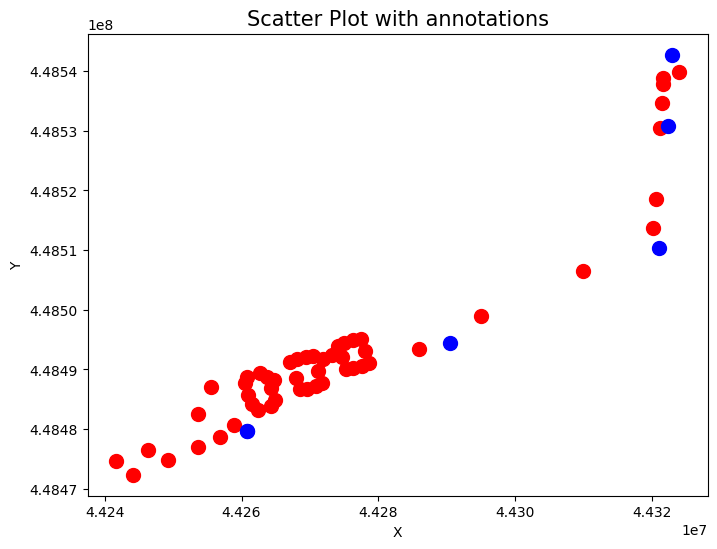

[96476, 96466, 96474, 96473, 96467, 96472, 96468, 96471, 96469, 96470, 96475, 96465, 96463, 96464, 96462, 96461, 96451, 96458, 96460, 96452, 96446, 96459, 96453, 96445, 96454, 96444, 96442, 96443, 96450, 96447, 96449, 96455, 96448, 96456, 96457, 96440, 96439, 96438, 96434, 96441, 96437, 96435, 96436, 96376, 96375, 96377, 96378, 96382, 96379, 96396, 96380, 96394, 96393, 96383, 96389, 96392, 96381, 96385, 96395, 96418, 96397, 96388, 96391, 96398, 96387, 96399, 96433, 96384, 96400, 96409, 96390, 96386, 96410, 96401, 96408, 96407, 96402, 96417, 96420, 96411, 96419, 96416, 96406, 96403, 96423, 96412, 96422, 96404, 96424, 96421, 96405, 96415, 96425, 96432, 96413, 96414, 96426, 96431, 96427, 96428, 96429, 96430]


<Figure size 800x800 with 0 Axes>

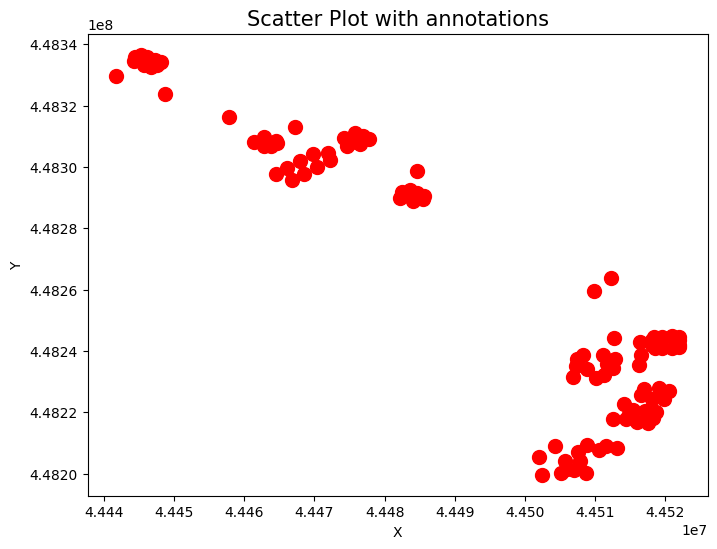

[96225, 96224, 96219, 96223, 96222, 96221, 96217, 96220, 96218, 96216, 96214, 96215, 96212, 96213, 96210, 96211, 96208, 96209, 96207, 96206, 96204, 96205, 96203, 96202, 96201, 96200, 96198, 96196, 96199, 96193, 96197, 96191, 96189, 96195, 96194, 96192, 96187, 96190, 96188, 96185, 96186]


<Figure size 800x800 with 0 Axes>

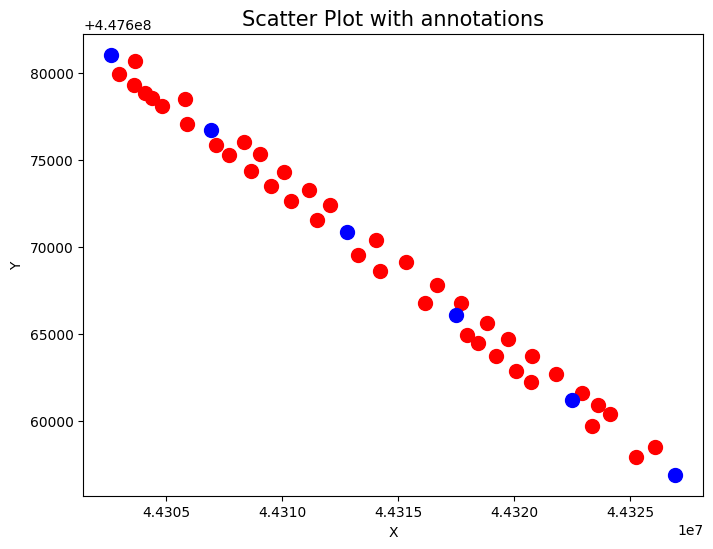

[123145, 123139, 123137, 123144, 123143, 123142, 123141, 123135, 123133, 123140, 123138, 123136, 123122, 123134, 123121, 123132, 123120, 123119, 123123, 123118, 123124, 123117, 123115, 123116, 123125, 123114, 123131, 123113, 123130, 123129, 123128, 123127, 123126, 123112, 123111, 123108, 123110, 123107, 123109, 123104, 123102, 123100, 123098, 123096, 123094, 123092, 123090, 123106, 123088, 123105, 123086, 123103, 123101, 123099, 123079, 123097, 123095, 123077, 123075, 123093, 123073, 123091, 123071, 123089, 123069, 123087, 123067, 123085, 123084, 123083, 123082, 123081, 123080, 123078, 123065, 123076, 123074, 123060, 123072, 123070, 123062, 123056, 123068, 123050, 123058, 123066, 123064, 123051, 123054, 123063, 123048, 123052, 123061, 123059, 123053, 123057, 123055, 123049, 123047, 123046, 123045]


<Figure size 800x800 with 0 Axes>

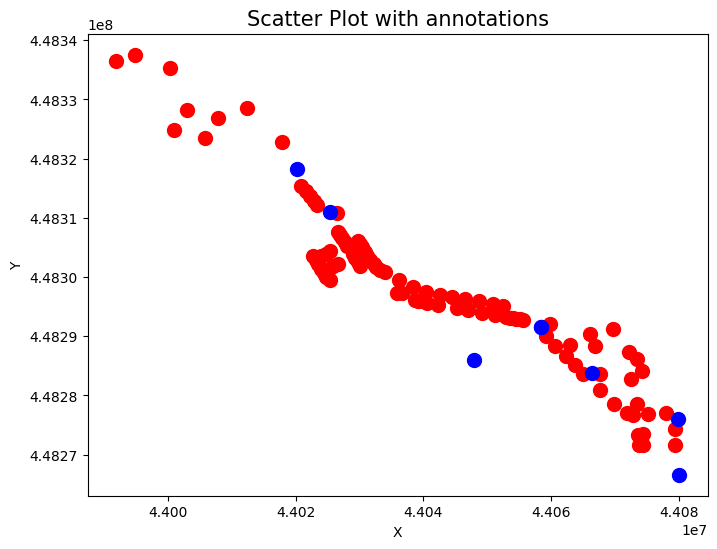

In [72]:
import warnings
warnings.filterwarnings('ignore')

d = direcciones[['Codigo de via', 'Coordenada X (Guia Urbana) cm', 'Coordenada Y (Guia Urbana) cm']]
display(d.head())
d['tipo'] = ['direcciones' for i in range(len(d))]

d = d.rename(columns={'Codigo de via': 'codigo'})


d = d.rename(columns={'Coordenada X (Guia Urbana) cm': 'x'})


d = d.rename(columns={'Coordenada Y (Guia Urbana) cm': 'y'})


d['codigo'] = d['codigo'].astype(int)
d = d[d['x'] != '000000-100']

d['x'] = d['x'].astype(int)
d['y'] = d['y'].astype(int)


c = cruces[['Codigo de vía tratado', 'Coordenada X (Guia Urbana) cm (cruce)', 'Coordenada Y (Guia Urbana) cm (cruce)']]
c['tipo'] = ['cruces' for i in range(len(c))]
c = c.rename(columns={'Codigo de vía tratado': 'codigo'})
c = c.rename(columns={'Coordenada X (Guia Urbana) cm (cruce)': 'x'})
c = c.rename(columns={'Coordenada Y (Guia Urbana) cm (cruce)': 'y'})
c['codigo'] = c['codigo'].astype(int)
c['x'] = c['x'].astype(int)
c['y'] = c['y'].astype(int)

# for cruce in c.iterrows():

# ordenar d por coordenadas y codigo de via

d = d.sort_values(by=['codigo', 'x', 'y'])
display(d.head())

# graficar los puntos del codigo 127
import matplotlib.pyplot as plt
for n in [127,31000091,375700, 471100]:
    plt.figure(figsize=(8, 8))

    x = d[d['codigo'] == n]['x']
    y = d[d['codigo'] == n]['y']

    annotations=[i.Index for i in d[d['codigo'] == n].itertuples()]
    print(annotations)
    plt.figure(figsize=(8,6))
    plt.scatter(x,y,s=100,color="red")
    plt.scatter(c[c['codigo']== n]['x'], c[c['codigo']== n]['y'],s=100,color="blue")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Scatter Plot with annotations",fontsize=15)
    #for i, label in enumerate(annotations):
    #    plt.annotate(label, (x.values[i], y.values[i]))

    plt.show()

In [61]:
for cruce in c.iterrows():
    d_temp = d[d['codigo'] == cruce[1]['codigo']]
    x, y = cruce[1]['x'], cruce[1]['y']
    for dir in d_temp.iterrows():
        x1, y1 = dir[1]['x'], dir[1]['y']
        distancia = ((x1 - x)**2 + (y1 - y)**2)**0.5
        
        
        

52


In [6]:
# Primero, en la columna de Literal de numeracion, reemplazamos "KM.", " ", "EN", "SA", "NUM" por ""
# for replacement in ['KM.', ' ', 'EN', 'SA', 'NUM']:
#     direcciones['Literal de numeracion'] = direcciones['Literal de numeracion'].str.replace(replacement, '')

# Creamos una columna en la que almacenamos la direccion de la forma <codigo de via>-<literal de numeracion (sin letras)>
direcciones['Direccion'] = direcciones['Codigo de via'].astype(str) + '-' + direcciones['Literal de numeracion'].str.replace('[a-zA-Z.]', '')

direcciones = direcciones.groupby('Direccion').mean().reset_index()
direcciones

/var/folders/y8/t4864jg93dsgpnkkldf_6yl00000gn/T/ipykernel_36319/2325632065.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  direcciones['Direccion'] = direcciones['Codigo de via'].astype(str) + '-' + direcciones['Literal de numeracion'].str.replace('[a-zA-Z.]', '')


KeyboardInterrupt: 

## Cosas q hacer:

- Calles con numeros y letras unificarlas en un numero (hacer media de coordenadas)
- Introducir cruces en dataset de direcciones en su lugar correspondiente
- Navegar por los nodos, guardando informacion de las calles que cruzan, coordenadas y nodos adyacentes.
- Crear un grafo con las calles y sus cruces


## Dudas

- ¿Se puede crear una nueva columna?
- ¿Qué hacemos con los valores erróneos?